# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
#import warnings
#warnings.filterwarnings("ignore")

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 595


In [4]:
print(cities)

['zeya', 'dalhousie', 'guarapari', 'bellary', 'port-aux-francais', 'grytviken', 'tuy hoa', 'sokode', 'bethel', 'west sayville', 'tabou', 'ponta delgada', 'anadyr', 'carbonear', 'college', 'tiksi', 'yellowknife', 'waitangi', 'queenstown', 'inhambane', 'wamba', 'west island', 'ouagadougou', 'bamnet narong', 'stanley', 'nishinoomote', 'prieska', 'puerto ayora', 'hamilton', 'mawlaik', 'choma', 'carnarvon', 'chiredzi', 'punta arenas', 'happy valley-goose bay', 'kodiak', 'adamstown', 'alotau', 'labrador city', 'suva', 'ta`u', 'staryye ozinki', 'thompson', 'aasiaat', 'tazovsky', 'bilibino', 'katsuura', "mil'kovo", 'peace river', 'wahpeton', 'qaqortoq', 'lebu', 'saint-philippe', 'saint-joseph', 'san patricio', 'ashburton', 'edinburgh of the seven seas', 'tranovaho', "ust'-barguzin", 'vorgashor', 'dongola', 'westport', 'minas de marcona', 'taiohae', 'longyearbyen', 'prince george', 'agogo', 'vilyuysk', 'rio grande', 'manismata', 'san andres', 'lorengau', "nar'yan-mar", 'kristiansund', 'ilulissa

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL

url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=metric"
# Define an empty list to fetch the weather data for each city3
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = time.ctime(city_weather['dt'])[4:11] + time.ctime(city_weather['dt'])[-4:]
        print(city_date)
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | zeya
Jun 24 2023
Processing Record 2 of Set 1 | dalhousie
Jun 24 2023
Processing Record 3 of Set 1 | guarapari
Jun 24 2023
Processing Record 4 of Set 1 | bellary
Jun 24 2023
Processing Record 5 of Set 1 | port-aux-francais
Jun 24 2023
Processing Record 6 of Set 1 | grytviken
Jun 24 2023
Processing Record 7 of Set 1 | tuy hoa
Jun 24 2023
Processing Record 8 of Set 1 | sokode
Jun 24 2023
Processing Record 9 of Set 1 | bethel
Jun 24 2023
Processing Record 10 of Set 1 | west sayville
Jun 24 2023
Processing Record 11 of Set 1 | tabou
Jun 24 2023
Processing Record 12 of Set 1 | ponta delgada
Jun 24 2023
Processing Record 13 of Set 1 | anadyr
Jun 24 2023
Processing Record 14 of Set 1 | carbonear
Jun 24 2023
Processing Record 15 of Set 1 | college
Jun 24 2023
Processing Record 16 of Set 1 | tiksi
Jun 24 2023
Processing Record 17 of Set 1 | yellowknife
Jun 24 2023
Processing Record 18 of Set 1 | waitangi


In [ ]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          550
Lat           550
Lng           550
Max Temp      550
Humidity      550
Cloudiness    550
Wind Speed    550
Country       550
Date          550
dtype: int64

In [ ]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kodiak,57.7900,-152.4072,9.73,93,100,5.66,US,Jun 24 2023
1,trairi,-3.2778,-39.2689,26.79,71,85,3.25,BR,Jun 24 2023
2,weno,7.4515,151.8468,25.97,89,100,0.00,FM,Jun 24 2023
3,adamstown,-25.0660,-130.1015,20.51,59,100,4.90,PN,Jun 24 2023
4,inarajan village,13.2736,144.7484,28.54,90,95,5.30,GU,Jun 24 2023


In [ ]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data.csv", index_label="City_ID")

In [ ]:
# Read saved data
city_data_df = pd.read_csv("output_data.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kodiak,57.7900,-152.4072,9.73,93,100,5.66,US,Jun 24 2023
1,trairi,-3.2778,-39.2689,26.79,71,85,3.25,BR,Jun 24 2023
2,weno,7.4515,151.8468,25.97,89,100,0.00,FM,Jun 24 2023
3,adamstown,-25.0660,-130.1015,20.51,59,100,4.90,PN,Jun 24 2023
4,inarajan village,13.2736,144.7484,28.54,90,95,5.30,GU,Jun 24 2023


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

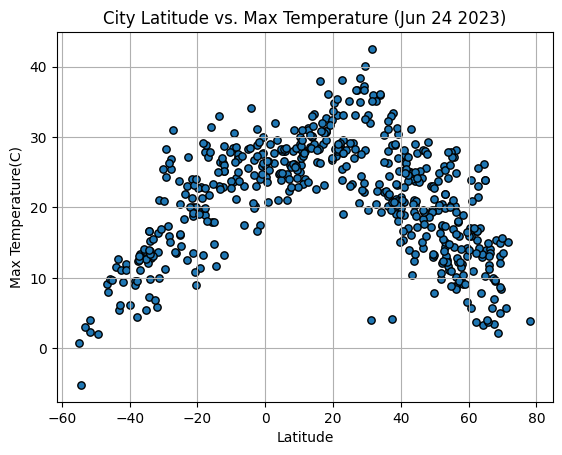

In [ ]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot(kind='scatter', x='Lat', y='Max Temp', grid=True, edgecolor='black', s=28)

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Max Temperature ({city_date})')
plt.ylabel('Max Temperature(C)')
plt.xlabel('Latitude')

# Save the figure
#plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

FileNotFoundError: [Errno 2] No such file or directory: 'output_data/Fig2.png'

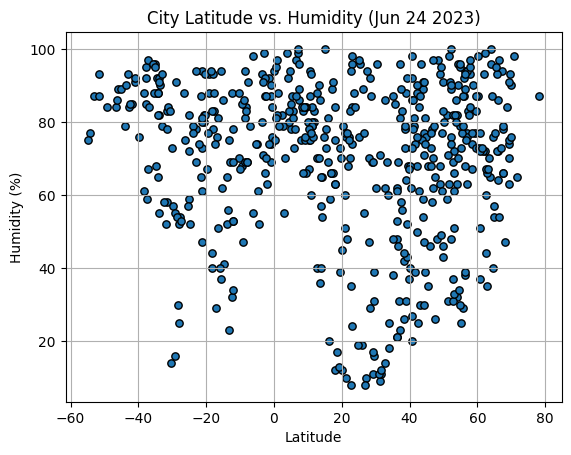

In [ ]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(kind='scatter', x='Lat', y='Humidity', grid=True, edgecolor='black', s=28)

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Humidity ({city_date})')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

FileNotFoundError: [Errno 2] No such file or directory: 'output_data/Fig3.png'

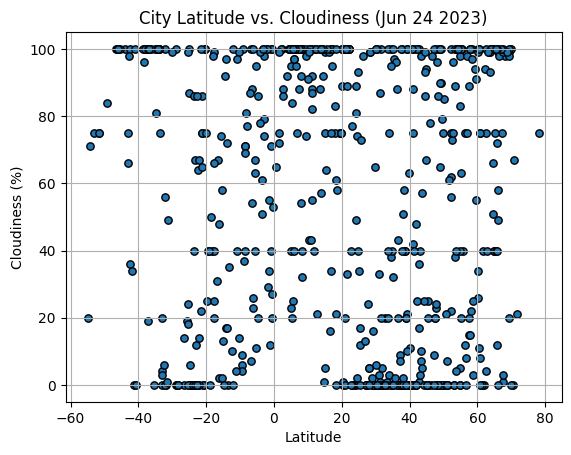

In [ ]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(kind='scatter', x='Lat', y='Cloudiness', grid=True, edgecolor='black', s=28)


# Incorporate the other graph properties
plt.title(f'City Latitude vs. Cloudiness ({city_date})')
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

FileNotFoundError: [Errno 2] No such file or directory: 'output_data/Fig4.png'

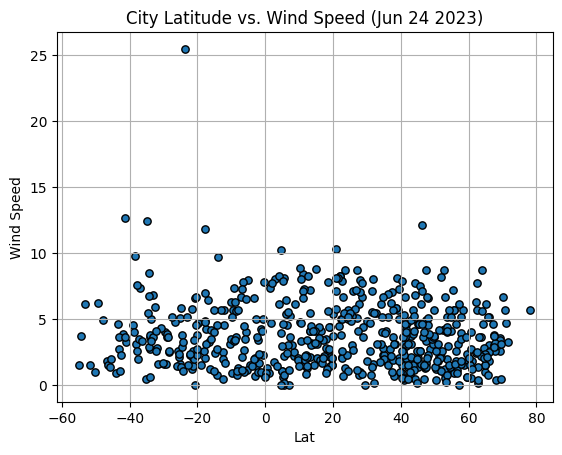

In [ ]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(kind='scatter', x='Lat', y='Wind Speed', grid=True, edgecolor='black', s=28)


# Incorporate the other graph properties
plt.title(f'City Latitude vs. Wind Speed ({city_date})')


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [2]:
# Define a function to create Linear Regression plots
def plot_lin_regression (dataframe, x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(dataframe[x_values], dataframe[y_values])
    regress_values = dataframe[x_values] * slope + intercept
    line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    dataframe.plot(kind='scatter', x=x_values, y=y_values, s=28)
    plt.plot(dataframe[x_values], regress_values, "r")
    plt.annotate(line_equation,((dataframe[x_values].max() + dataframe[x_values].min())/2,dataframe[y_values].min()), fontsize=14,color="red")
    print(f"The r-value is: {rvalue}")

###  Temperature vs. Latitude Linear Regression Plot

In [ ]:
north_hemi_weather_df = city_data_df.loc[city_data_df["Lat"] >= 0]
north_hemi_weather_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kodiak,57.7900,-152.4072,9.73,93,100,5.66,US,Jun 24 2023
2,weno,7.4515,151.8468,25.97,89,100,0.00,FM,Jun 24 2023
4,inarajan village,13.2736,144.7484,28.54,90,95,5.30,GU,Jun 24 2023
8,wailua homesteads,22.0669,-159.3780,28.44,76,100,7.72,US,Jun 24 2023
9,aleksandrov gay,50.1470,48.5704,19.60,80,100,4.29,RU,Jun 24 2023


In [ ]:
south_hemi_weather_df = city_data_df.loc[city_data_df["Lat"] < 0]
south_hemi_weather_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,trairi,-3.2778,-39.2689,26.79,71,85,3.25,BR,Jun 24 2023
3,adamstown,-25.0660,-130.1015,20.51,59,100,4.90,PN,Jun 24 2023
5,buala,-8.1450,159.5921,27.14,84,100,3.80,SB,Jun 24 2023
6,malango,-2.9627,119.9001,20.22,99,99,0.17,ID,Jun 24 2023
7,nampula,-15.1165,39.2666,14.81,86,1,1.95,MZ,Jun 24 2023


The r-value is: -0.681292139299013


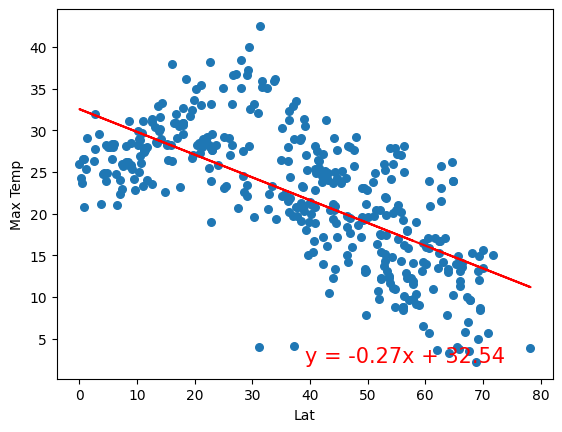

In [ ]:
plot_lin_regression(north_hemi_weather_df, 'Lat', 'Max Temp')


The r-value is: 0.7893918520122959


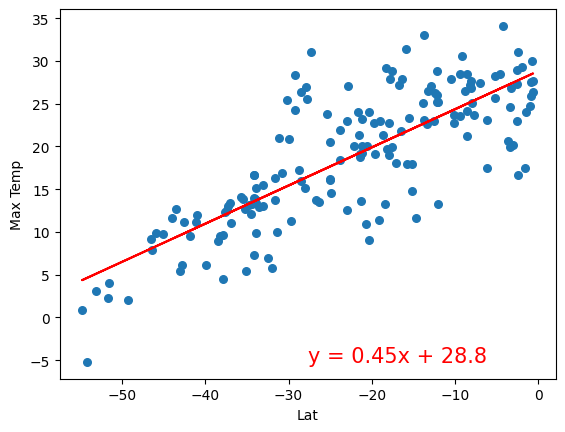

In [ ]:
# Linear regression on Northern Hemisphere
plot_lin_regression(south_hemi_weather_df, 'Lat', 'Max Temp')

**Discussion about the linear relationship:** There is a srong correlation between temperature and latitude in both the hemispheres. However in south hemisphere its positive and in north hemisphere its negative.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.005297362076136621


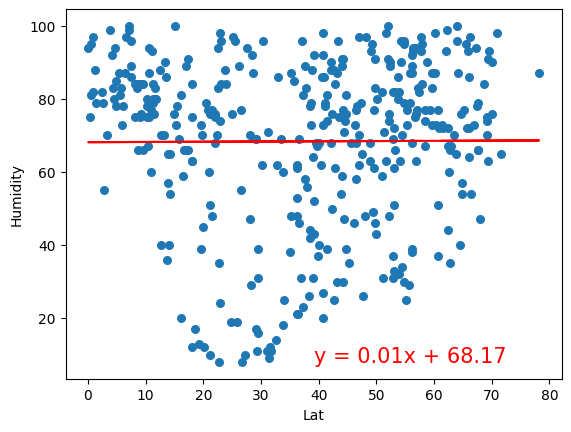

In [ ]:
# Northern Hemisphere
plot_lin_regression(north_hemi_weather_df, 'Lat', 'Humidity')

The r-value is: -0.14438564256362071


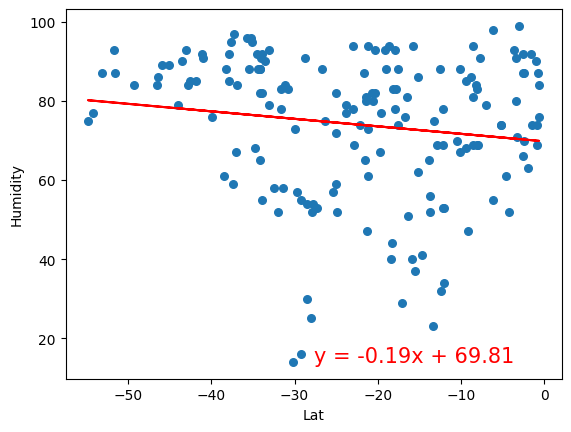

In [ ]:
# Southern Hemisphere
plot_lin_regression(south_hemi_weather_df, 'Lat', 'Humidity')

**Discussion about the linear relationship:** There is no correlation between latitude and humidity. However, there is some correlation in southern hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.09014320847440853


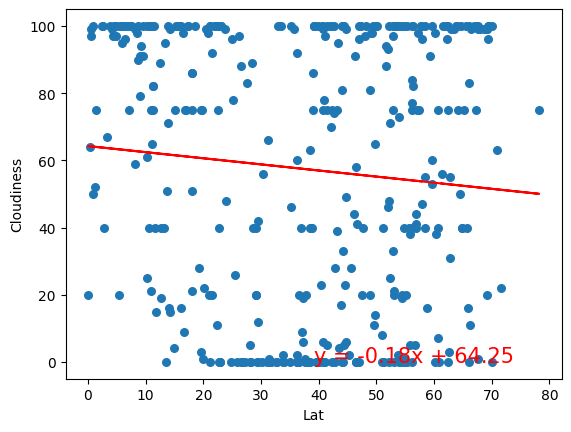

In [ ]:
# Northern Hemisphere
plot_lin_regression(north_hemi_weather_df, 'Lat', 'Cloudiness')


The r-value is: -0.0721177731205861


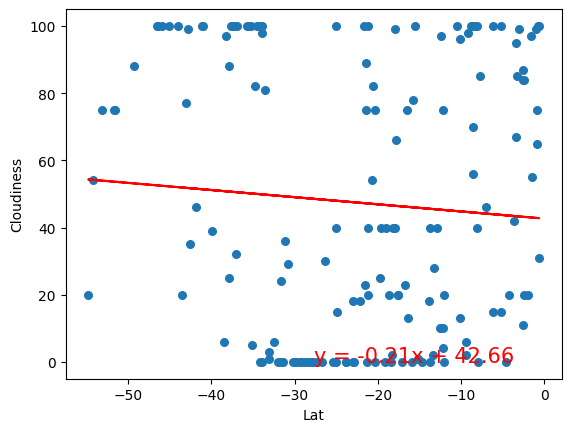

In [ ]:
# Southern Hemisphere
plot_lin_regression(south_hemi_weather_df, 'Lat', 'Cloudiness')

**Discussion about the linear relationship:** There is no correlation between Cloudiness and latitude for both the hemispheres.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.25012890358012557


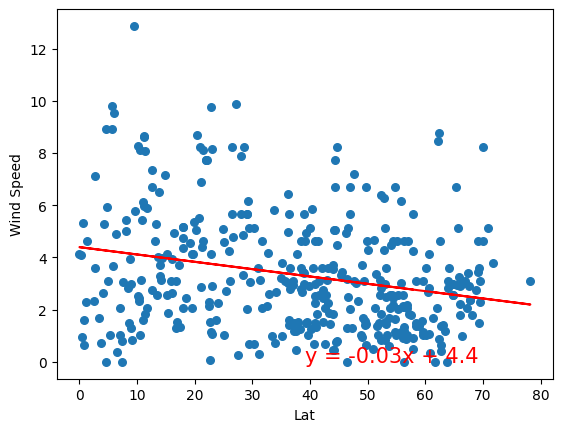

In [ ]:
# Northern Hemisphere
plot_lin_regression(north_hemi_weather_df, 'Lat', 'Wind Speed')

The r-value is: -0.10780333190446836


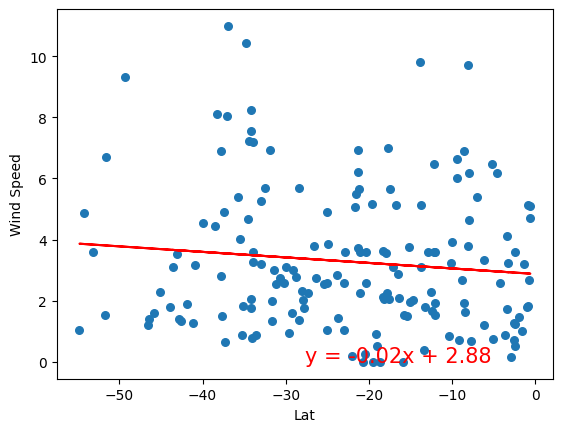

In [ ]:
# Southern Hemisphere
plot_lin_regression(south_hemi_weather_df, 'Lat', 'Wind Speed')

**Discussion about the linear relationship:** There is no correlation between Wind speed and latitude for both the hemispheres.